In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [99]:
#dataurl = 'https://raw.githubusercontent.com/buruzaemon/me-ml/master/ISLR/Data/Advertising.csv'

from sklearn.datasets import load_boston

data = pd.DataFrame(load_boston().data, columns = boston['feature_names'])



df2 = pd.DataFrame(boston.target, columns=['MEDV'])

data2 = pd.concat([data, df2], axis=1)


#print(boston.data)

#data = pd.read_csv(dataurl, index_col=0)
print("Number of instances:",data.shape)

#adding a binary attribute
#data['Size'] = 'small'
#mask_large = np.random.rand(len(data)) > 0.5
#data.loc[mask_large, 'Size'] = 'large'

#adding a nominal attribute
#nums = np.random.rand(len(data))
#data['Area'] = 'rural'
#data.loc[(nums > 0.33) & (nums < 0.66), 'Area'] = 'suburban'
#data.loc[nums > 0.66, 'Area'] = 'urban'

data.head()

Number of instances: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


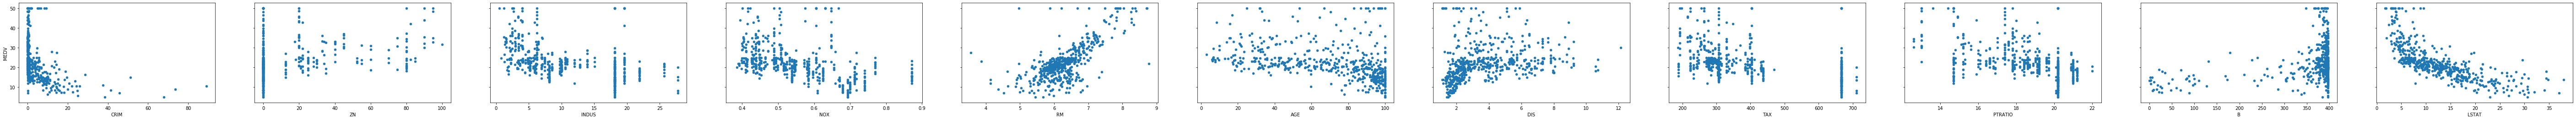

In [100]:
fig, axs = plt.subplots(1, 11, sharey=True)

data2.plot(kind='scatter', x='CRIM', y='MEDV', ax=axs[0], figsize=(100, 4))
data2.plot(kind='scatter', x='ZN', y='MEDV', ax=axs[1])
data2.plot(kind='scatter', x='INDUS', y='MEDV', ax=axs[2])
#data.plot(kind='scatter', x='CHAS', y='MEDV', ax=axs[3])
data2.plot(kind='scatter', x='NOX', y='MEDV', ax=axs[3])
data2.plot(kind='scatter', x='RM', y='MEDV', ax=axs[4])
data2.plot(kind='scatter', x='AGE', y='MEDV', ax=axs[5])
data2.plot(kind='scatter', x='DIS', y='MEDV', ax=axs[6])
#data.plot(kind='scatter', x='RAD', y='MEDV', ax=axs[8])
data2.plot(kind='scatter', x='TAX', y='MEDV', ax=axs[7])
data2.plot(kind='scatter', x='PTRATIO', y='MEDV', ax=axs[8])
data2.plot(kind='scatter', x='B', y='MEDV', ax=axs[9])
data2.plot(kind='scatter', x='LSTAT', y='MEDV', ax=axs[10])


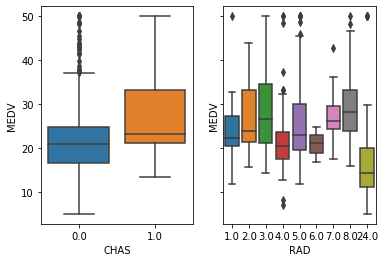

In [101]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, sharey=True)
sns.boxplot(x="CHAS", y="MEDV", data=data2, ax=axs[0])
sns.boxplot(x="RAD", y="MEDV", data=data2, ax=axs[1])

In [102]:
from sklearn.linear_model import LinearRegression

y = pd.DataFrame(boston.target, columns=['MEDV'])
X = data#data.Sales

In [103]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
print("Intercept:",lm.intercept_,"\nCoefficients:",lm.coef_,"\nR2:",lm.score(X, y))

Intercept: 2.9388893694594085 

Intercept: [36.45948839] 
Coefficients: [[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]] 
R2: 0.7406426641094094


In [105]:
lm.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])
           
           
           

array([[30.00384338]])

In [138]:
from sklearn.model_selection import cross_val_score
#X = dendata[['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']]
#y = dendata.Sales
y = pd.DataFrame(boston.target, columns=['MEDV'])
X = data#data.Sales

# instantiate, fit and print coeff
lm = LinearRegression()
cross_val_score(lm, X, y, cv=10)

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [140]:
y = pd.DataFrame(boston.target, columns=['MEDV'])
X = data#data.Sales

In [142]:
clf = DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])
           

array([24.])

In [110]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [143]:
y = pd.DataFrame(boston.target, columns=['MEDV'])
X = data#data.Sales

# instantiate, fit and print coeff
clf = DecisionTreeRegressor()
cross_val_score(clf, X, y, cv=10)

array([ 0.55126543,  0.53125848, -1.50469989,  0.05726199,  0.75488716,
        0.43278788,  0.20793495,  0.38468516, -3.46489892, -0.9785929 ])

ValueError: x and y must be the same size

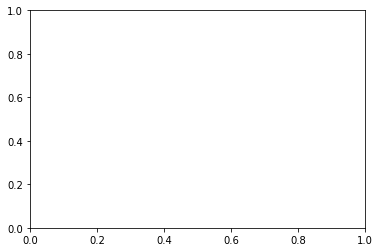

In [145]:
# 1. Create a random dataset
rng = np.random.RandomState(1)
#X = np.sort(5 * rng.rand(80, 1), axis=0)
#y = np.sin(X).ravel()
#y[::5] += 3 * (0.5 - rng.rand(16))

y = pd.DataFrame(boston.target, columns=['MEDV'])
X = data#data.Sales

# 2. Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# 3. Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])
y_2 = regr_2.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])

# 4. Plot results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [113]:
from sklearn import neighbors

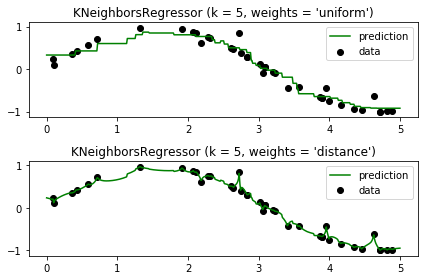

In [114]:
# 1. generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8)) #add noise to target

# 2. fit KNN regression model
n_neighbors = 5
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    # 3. plot utils
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [115]:
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, BayesianRidge, Lasso
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import check_random_state
from sklearn.pipeline import make_pipeline

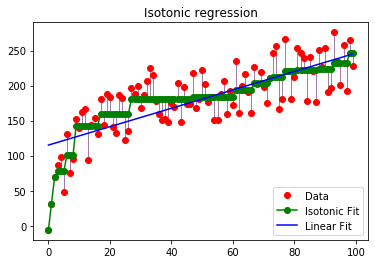

In [116]:
# 1. generate data
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

# 2. fit IsotonicRegression and LinearRegression models
ir = IsotonicRegression()
y_ = ir.fit_transform(x, y)
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

# 3. plot result
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

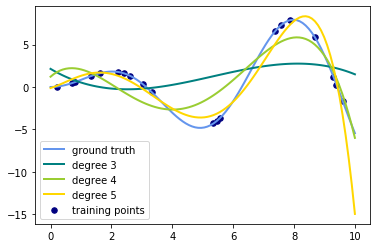

In [117]:
def f(x): return x * np.sin(x)

# 1. generate data and plotting points
x_plot = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
X, y = x[:, np.newaxis], f(x)
X_plot = x_plot[:, np.newaxis]

# 2. plot utils
colors = ['teal', 'yellowgreen', 'gold']
plt.plot(x_plot,f(x_plot),color='cornflowerblue',linewidth=2,label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

# 3. fit polynomial regressors of varying order
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot,y_plot,color=colors[count],linewidth=2,label="degree %d"%degree)

plt.legend(loc='lower left')
plt.show()

In [118]:
reg = Ridge(alpha=.5)
reg.fit ([[0, 0], [0, -1], [1, 1]], [0, .1, 1]) 
print("Intercept:",reg.intercept_,"\nCoefficients:",reg.coef_)

Intercept: 0.24782608695652175 
Coefficients: [0.35652174 0.2173913 ]


In [119]:
reg = BayesianRidge()
reg.fit ([[0, 0], [0, -1], [1, 1]], [0, .1, 1]) 
print("Intercept:",reg.intercept_,"\nCoefficients:",reg.coef_)

Intercept: 7.541126846422053e-06 
Coefficients: [ 1.09997738 -0.09998852]


In [120]:
reg = Lasso(alpha = 0.1)
reg.fit ([[0, 0], [0, -1], [1, 1]], [0, .1, 1]) 
print("Intercept:",reg.intercept_,"\nCoefficients:",reg.coef_)

Intercept: 0.2999821417909831 
Coefficients: [0.20005357 0.19997321]


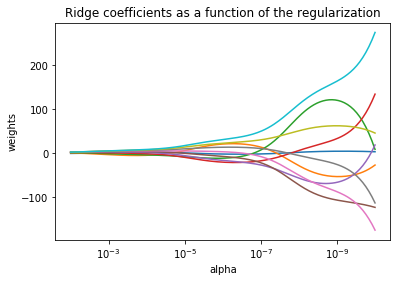

In [121]:
# 1. generate data
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# 2. compute Ridge regression for different regularization
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# 3. display results
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [122]:
reg = RidgeCV(alphas=[0.01, 0.1, 1.0], cv=3)
reg.fit([[0, 0], [0, -1], [1, 1]], [0, .1, 1])       
reg.alpha_                                      

/Users/joaotiagoaparicio/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/joaotiagoaparicio/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/joaotiagoaparicio/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/joaotiagoaparicio/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/joaotiagoaparicio/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: Un

0.01

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
     max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

5.009154859960319

In [124]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X, y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

In [125]:
X = dendata[['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']]
y = dendata.Sales
clf = neighbors.KNeighborsRegressor(4)
clf = clf.fit(X, y)
clf.score(X, y) #R2

0.9612181823510015

In [126]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=dendata).fit()
lm.params # print the coefficients

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [127]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        14:00:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
print("R2:",lm.rsquared)

R2: 0.8972106381789522


In [129]:
print("Variable p-values:",lm.pvalues)

Variable p-values: Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


In [130]:
from sklearn import metrics

In [131]:
X = dendata[['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']]
y = dendata.Sales
clf = neighbors.KNeighborsRegressor(4)
cross_val_score(clf, X, y, cv=10, scoring='r2')

array([0.95943587, 0.88778376, 0.87918342, 0.94640687, 0.94919978,
       0.93814289, 0.89711728, 0.92768928, 0.89876696, 0.9578036 ])

In [132]:
cross_val_score(clf, X, y, cv=10, scoring='max_error')

array([-2.275, -5.175, -5.425, -2.925, -2.6  , -2.4  , -4.425, -3.15 ,
       -3.15 , -2.65 ])

In [133]:
cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error')

array([-0.9075 , -1.05375, -1.39375, -0.91875, -0.72875, -1.05125,
       -1.3175 , -0.97   , -1.09375, -0.85   ])

In [134]:
#evaluating predictions from different folds
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
metrics.mean_squared_error(y_true, y_pred)

0.7083333333333334

In [135]:
metrics.explained_variance_score(y_true, y_pred)

0.9838709677419355

In [136]:
metrics.mean_absolute_error(y_true, y_pred)

0.75

In [137]:
metrics.r2_score(y_true, y_pred) #R2 on testing set

0.9368005266622779